In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [56]:
data=pd.read_csv(r"C:\Users\rudra\Downloads\Salary Data.csv")
data.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [58]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

## Basic EDA

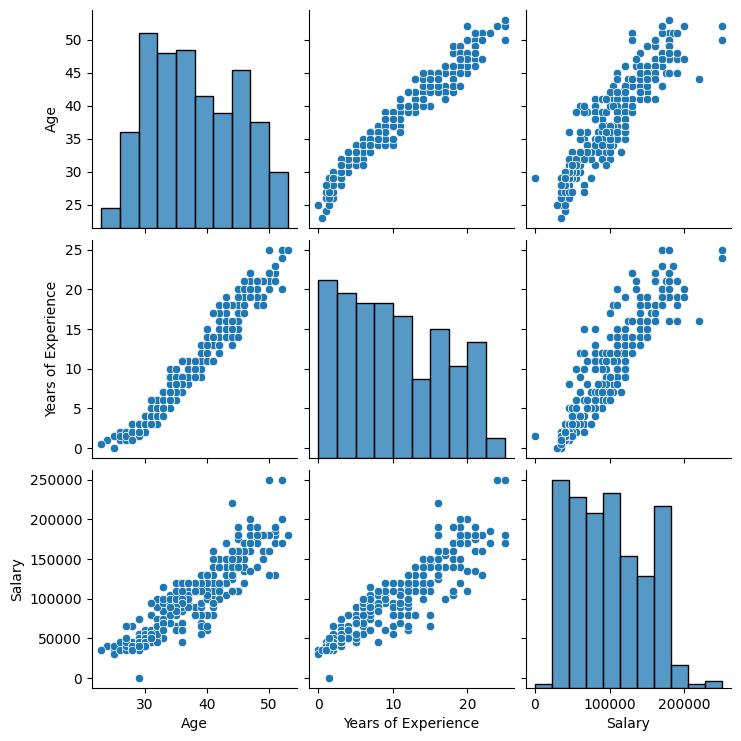

In [61]:
sns.pairplot(data=data)
plt.show()

In [65]:
data.dropna(inplace=True)

## Train/Test Split

In [68]:
x=data.iloc[:,:-1]
y=data['Salary']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=66)

In [70]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe=OneHotEncoder()
ohe.fit(x[[1,3]])

## Column Transformers

In [72]:
colm_tran=make_column_transformer((OrdinalEncoder(categories=[["Bachelor's", "Master's", 'PhD']]),[2]),
                                  (OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[1,3]),
                                  remainder="passthrough")

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

## Import Pipeline

In [77]:
pipe=make_pipeline(colm_tran,lr)

In [79]:
pipe

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ordinalencoder', ...), ('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [81]:
pipe.fit(x_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ordinalencoder', ...), ('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [83]:
y_prd=pipe.predict(x_test)
df=pd.DataFrame({'Actual':y_test,"Predict":y_prd})
df.head()

,Actual,Predict
301,55000.0,50998.423707
67,45000.0,73150.417848
328,110000.0,107289.290256
275,120000.0,108974.467682
303,150000.0,150000.000000


## Accuracy Score

In [86]:
pipe.score(x_test,y_test)*100

94.24814369261146

## Exporting Pipeline

In [88]:
import pickle
pickle.dump(pipe,open("job_prediction.pkl","wb"))

In [90]:
for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    pipe.fit(x_train,y_train)
    print(pipe.score(x_test,y_test)*100,i)

88.20120570994378 1
80.22965098308019 2
78.61193159302753 3
87.80123734849958 4
85.34223233676425 5
85.14507153449682 6
87.9379817378763 7
79.33317574480643 8
80.45646723504281 9
85.9103499311193 10
86.16243643288901 11
86.81998614243297 12
84.8078888665938 13
90.27329806847332 14
81.5684892941577 15
82.58179433066333 16
83.9876512579085 17
84.61344402060269 18
89.97937796318747 19
85.9760285283147 20
89.00286300423255 21
91.86315109084263 22
91.35355388481457 23
85.36283745508572 24
88.098308201024 25
80.93002440237746 26
90.59696869593206 27
87.89203282447468 28
85.58433269427972 29
83.08160437717824 30
84.81256201177119 31
88.62103384948308 32
89.40416615691188 33
88.04560972707336 34
83.6283284910245 35
88.58524176504692 36
83.57397531458979 37
87.74047629234921 38
83.94636143083434 39
91.21926880851566 40
87.46669889647866 41
85.1674579283646 42
84.1382902101399 43
84.8461589693335 44
89.49469316443134 45
90.88419210762206 46
87.9873177639171 47
90.05688060735797 48
85.29518397718